## Example Notebook for Finding the Higgs boson

In [27]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

gg_file_name = "../data/ATLAS/data.GamGam.root"
gg_file = uproot.open(gg_file_name)

In [26]:
tree = b'mini;1'
branches = [ b'photon_pt', b'photon_eta', 
            b'photon_phi', b'photon_E',
           b'photon_isTightID',b'photon_etcone20']
kins = {}
for branch in branches:
    kins[branch] = gg_file[tree].array(branch)

In [4]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    return fig, ax

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


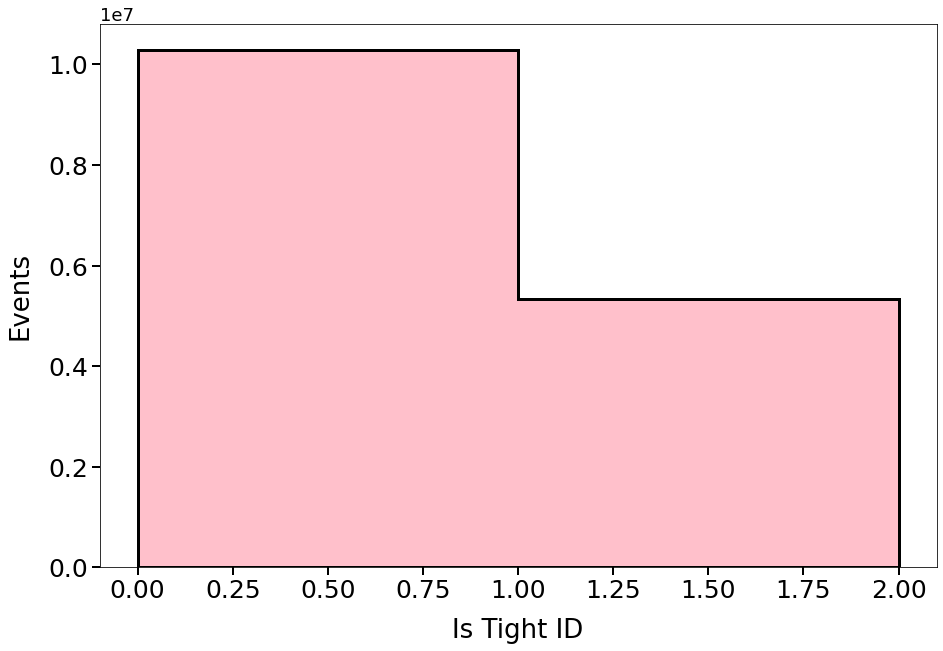

In [5]:
fig, ax = make_fig(xTitle="Is Tight ID",yTitle="Events")
# Use a different color for data
n, bins, patches = ax.hist(kins[b'photon_isTightID'].flatten(), 
                           [0,1,2],linewidth=3,histtype='stepfilled',
                           facecolor='pink',edgecolor="black",linestyle='-')

In [10]:
# convert everything to a more numpy friendly format
vars = {}
vars[b'photon_pt']  = np.array([[x[0],x[1]] for x in kins[b'photon_pt']])
vars[b'photon_phi'] = np.array([[x[0],x[1]] for x in kins[b'photon_phi']])
vars[b'photon_eta'] = np.array([[x[0],x[1]] for x in kins[b'photon_eta']])
vars[b'photon_E']   = np.array([[x[0],x[1]] for x in kins[b'photon_E']])

In [11]:
GeVperMeV = 1./1000
vars[b'photon_px']     = vars[b'photon_pt']*np.cos ( vars[b'photon_phi']) * GeVperMeV
vars[b'photon_py']     = vars[b'photon_pt']*np.sin ( vars[b'photon_phi']) * GeVperMeV
vars[b'photon_pz']     = vars[b'photon_pt']*np.sinh( vars[b'photon_eta']) * GeVperMeV
vars[b'photon_E_GeV']  = vars[b'photon_E'] * GeVperMeV

In [12]:
vars[b'higgs_px'] = np.array([ np.sum(i) for i in vars[b'photon_px'] ] )
vars[b'higgs_py'] = np.array([ np.sum(i) for i in vars[b'photon_py'] ] )
vars[b'higgs_pz'] = np.array([ np.sum(i) for i in vars[b'photon_pz'] ] )
vars[b'higgs_E']  = np.array([ np.sum(i) for i in vars[b'photon_E_GeV'] ] )

In [13]:
vars[b'higgs_pt'] = np.sqrt(vars[b'higgs_px']**2+vars[b'higgs_py']**2)
vars[b'higgs_p'] = np.sqrt(vars[b'higgs_pt']**2+vars[b'higgs_pz']**2)
vars[b'higgs_m'] = np.sqrt(vars[b'higgs_E']**2 - vars[b'higgs_p']**2)

<ipython-input-13-d47c2e4b504f>:3: RuntimeWarning: invalid value encountered in sqrt
  vars[b'higgs_m'] = np.sqrt(vars[b'higgs_E']**2 - vars[b'higgs_p']**2)


In [14]:
# Make histogram and extract bins
n, bins, patches = ax.hist(vars[b'higgs_m'], 
                           np.linspace(100,160,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-')

<ErrorbarContainer object of 3 artists>

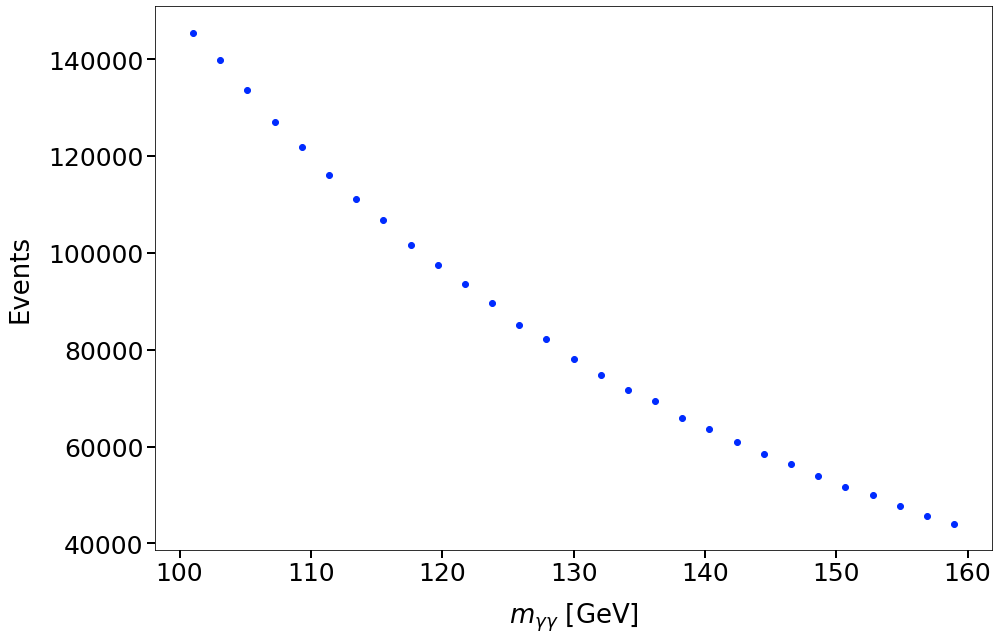

In [16]:
# Plot this as points
fig, ax = make_fig(xTitle="$m_{\gamma\gamma}$ [GeV]",yTitle="Events")
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
err = [np.sqrt(pt) for pt in n]

plt.errorbar(bins_mean, n,yerr=err,fmt="o")

## More cuts
- We can't see anything - let's apply some isolation, pT, and photon ID cuts

In [31]:
# Check for two photons with good ID, isolation cut, pT cuts
temp_indices = np.where((kins[b'photon_isTightID'].all()==1) & 
                               (kins[b'photon_etcone20'].all() < 4000.) )

In [19]:
good_photon_indices = []
# apply pT cuts
for index in temp_indices[0]:
    if kins[b'photon_pt'][index][0] > 40000. and kins[b'photon_pt'][index][1] > 30000.:
        good_photon_indices.append(index)
print("Efficiency of cut: {:.3}".format(len(good_photon_indices)/len(kins[b'photon_isTightID'])))
good_evt = {}
good_photon_indices = np.array(good_photon_indices)


Efficiency of cut: 0.0797


In [21]:
nice_good_evt = {}
nice_good_evt[b'higgs_m'] = np.take(vars[b'higgs_m'],good_photon_indices)

In [35]:
# Make histogram and extract bins
n, bins, patches = ax.hist(nice_good_evt[b'higgs_m'], 
                           np.linspace(100,160,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-')

<ErrorbarContainer object of 3 artists>

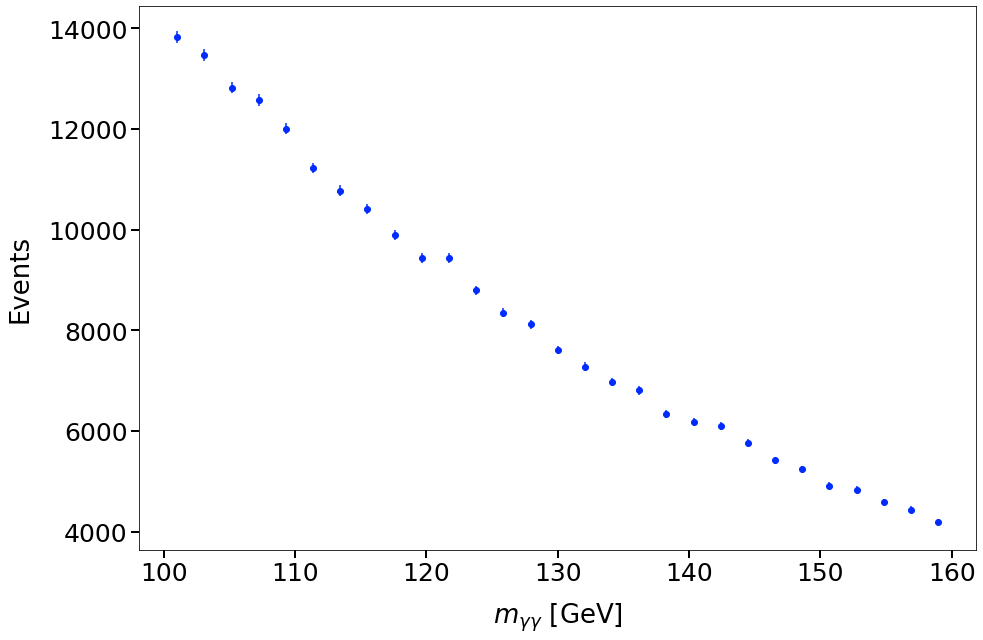

In [36]:
# Plot this as points
fig, ax = make_fig(xTitle="$m_{\gamma\gamma}$ [GeV]",yTitle="Events")
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
err = [np.sqrt(pt) for pt in n]

plt.errorbar(bins_mean, n,yerr=err,fmt="o")

- This is a tiny peak!